In [6]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.0/33.0 MB 33.3 MB/s eta 0:00:00


In [7]:
import cv2
import poseModule as pm
import numpy as np

cap = cv2.VideoCapture('/content/WhatsApp Video 2023-02-26 at 11.33.12 (1).mp4')

if not cap.isOpened():
    print("Error opening video stream or file")
    exit()

detector = pm.poseDetector()

count = 0
dir = 0

while True:

    #1.Image preprocessing
    success,image = cap.read()

    if not success:
        break

    image = cv2.resize(image,(640,480))
    cv2.putText(image,'SQUATS COUNTER',(310,100),cv2.FONT_HERSHEY_COMPLEX,2,(255,255,255),5)

    #2.Find body
    image = detector.findPose(image,draw = False)
    lmlist = detector.findPosition(image, draw =False)

    #3.Find angles of specific landmark
    if len(lmlist) != 0:
        angle = detector.findAngle(image,28,26,24)

    #4.Counting
    per = np.interp(angle,(58,170),(100,0))

    if per == 100:
        if dir == 0:
            count += 0.5
            dir = 1

    if per == 0:
        if dir == 1:
            count += 0.5
            dir = 0

    cv2.rectangle(image,(10,10),(150,150),(0,255,0),cv2.FILLED)
    cv2.putText(image,str(int(count)),(50,100),cv2.FONT_HERSHEY_COMPLEX,2,(0,0,0),5)

    bar = np.interp(angle,(58,170),(700,100))

    cv2.rectangle(image,(1100,100),(1200,700),(0,255,0),1)
    cv2.rectangle(image,(1100,int(bar)),(1200,700),(0,255,0),cv2.FILLED)

    cv2.putText(image,str(int(per)),(1080,90),cv2.FONT_HERSHEY_COMPLEX,3,(0,255,0),5)

    if per == 0:
        cv2.putText(image,'One More',(380,700),cv2.FONT_HERSHEY_COMPLEX,2,(0,0,255),2)

    cv2.imshow('squat counter',image)

    if cv2.waitKey(1) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()


DisabledFunctionError: ignored

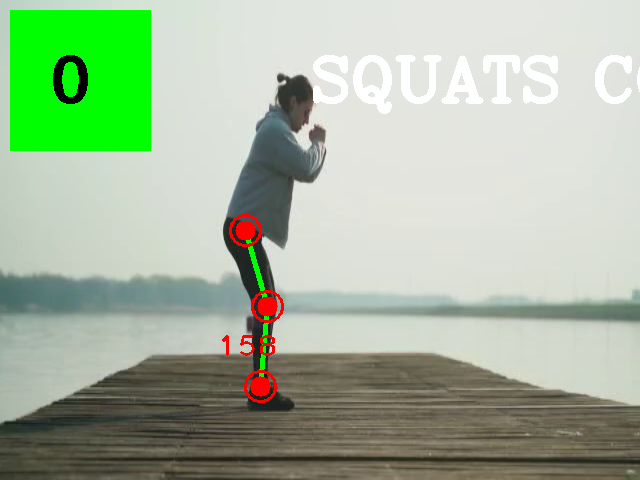

In [8]:
from google.colab.patches import cv2_imshow
cv2_imshow(image)
